In [1]:
!pip install langgraph

In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph, START , END

In [3]:
class AgentState(TypedDict):
  number_one: int
  number_two: int
  number_three:int
  number_four:int
  result: str
  operation: str
  operation_four: str

In [4]:
def adder(state: AgentState) -> AgentState:
  """This node adds two numbers"""
  state['number_three'] = state['number_one'] + state['number_two']
  return state


def subtractor(state: AgentState) -> AgentState:
  """This node subtracts two numbers"""
  state['number_three'] = state['number_one'] - state['number_two']
  return state

def add_to_four(state: AgentState) -> AgentState:
  """This node adds two numbers"""
  state['result'] = state['number_three'] + state['number_four']
  return state

def subtract_from_four(state: AgentState) -> AgentState:
  """This node subtracts two numbers"""
  state['result'] = state['number_three'] - state['number_four']
  return state


def decide_next_operation(state: AgentState) -> str:
  """This node decides which operation to perform next"""

  if state['operation'] == 'add':
    return 'add'
  else:
    return 'subtract'


def decide_next_operation_four(state: AgentState) -> str:
  """This node decides which operation to perform next"""

  if state['operation_four'] == 'add':
    return 'add'
  else:
    return 'subtract'



In [7]:
graph= StateGraph(AgentState)

graph.add_node('adder', adder)
graph.add_node('subtractor', subtractor)
graph.add_node('add_to_four', add_to_four)
graph.add_node('subtract_from_four', subtract_from_four)

graph.add_node('router', lambda state:state) # pass to function
graph.add_node('router_2', lambda state:state) # pass to function

graph.add_edge(START, 'router')
graph.add_conditional_edges(
    'router',
    decide_next_operation,
    {
        'add': 'adder',
        'subtract': 'subtractor'
    }
)

graph.add_edge('adder', 'router_2')
graph.add_edge('subtractor', 'router_2')

graph.add_conditional_edges(
    'router_2',
    decide_next_operation_four,
    {
        'add': 'add_to_four',
        'subtract': 'subtract_from_four'
    }
)

graph.add_edge('add_to_four', END)
graph.add_edge('subtract_from_four', END)



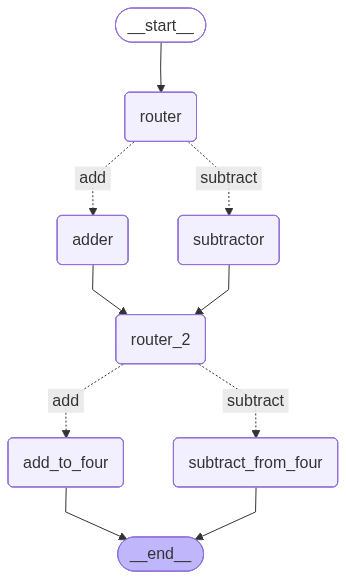

In [8]:
bot=graph.compile()

bot

In [10]:
input = {
    'number_one': 1,
    'number_two': 2,
    'number_three': 0,
    'number_four': 3,
    'operation': 'add',
    'operation_four': 'add'
}

response = bot.invoke(input)

print(response)

{'number_one': 1, 'number_two': 2, 'number_three': 3, 'number_four': 3, 'result': 6, 'operation': 'add', 'operation_four': 'add'}


In [11]:
input = {
    'number_one': 1,
    'number_two': 2,
    'number_three': 0,
    'number_four': 3,
    'operation': 'subtract',
    'operation_four': 'add'
}

response = bot.invoke(input)

print(response)

{'number_one': 1, 'number_two': 2, 'number_three': -1, 'number_four': 3, 'result': 2, 'operation': 'subtract', 'operation_four': 'add'}
